<a href="https://colab.research.google.com/github/Dong2Yo/DATA3550_1232/blob/main/Lectures/Chp12_st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Duck Typing & Polymorphism**

## Polymorphism

**Polymorphism** is a term used in Python to refer to an object's ability to take on multiple forms. The term is derived from two distinct terms: poly, which means numerous, and morphs, which means forms.

In [ ]:
class Dog:
    def __init__(self, name, age, friendliness):
        self.name = name
        self.age = age
        self.friendliness = friendliness

    def likes_walks(self):
        return True

    def bark(self):
        return "Woof, woof!"

    #inheritance
class Poodle(Dog):
    def __init__(self, name, age, friendliness):
      super().__init__(name, age, friendliness)

    def shedding_amount(self):
      return 0

class GoldenRetriever(Dog):
    def __init__(self, name, age, friendliness):
      super().__init__(name, age, friendliness)

    def fetch_ability(self):
      if self.age < 2:
        return 8
      elif self.age < 10 :
        return 10
      else:
        return 7

In [ ]:
rex = GoldenRetriever("Rex", 2, 10)
print(rex.name, rex.age, rex.friendliness)
print(rex.bark())

Rex 2 10
Woof, woof!


In [ ]:
# multiple inheritances
class GoldenDoodle(Poodle, GoldenRetriever):
  def __init__(self, name, age, friendliness):
      super().__init__(name, age, friendliness)

In [ ]:
goldie = GoldenDoodle("Goldie", 8, 9)
goldie.shedding_amount()
goldie.fetch_ability()

10

In [ ]:
# method overriding
class GoldenDoodle(Poodle, GoldenRetriever):
  def __init__(self, name, age, friendliness):
      super().__init__(name, age, friendliness)

  def bark(self):
    return "Aroooooooooo"

In [ ]:
goldie = GoldenDoodle("Goldie", 8, 9)
print(goldie.bark())

Aroooooooooo


## Duck Typing

Duck Typing and easier to ask for forgiveness than permission (EAFP)

**Duck Typing** : if an object walks like a duck, quacks like a duck, it is a duck.

**We do not care what type of object it is, but what behaviors it can do.**

In [ ]:
class DataStudent:
  def code(self, ide):
    ide.execute()


In [ ]:
tom = DataStudent()
tom.code(ide)

In [ ]:
class Pycharm:
  def execute(self):
    print("This is one of the IDEs.")

In [ ]:
class VScode:
  def execute(self):
    print("This is another one of the IDEs.")

In [ ]:
# ide = Pycharm()
ide = VScode()
tom = DataStudent()
tom.code(ide)

This is another one of the IDEs.


In [ ]:
class Duck:

    def quack(self):
        print('Quack, quack!!')

    def fly(self):
        print('Flap, flap!!')

class Person:

    def quack(self):
        print('I am quacking like a duck.')

    def fly(self):
        print('I am flapping my arms.')


def quack_and_fly(thing) :
    thing.quack()
    thing.fly()

In [ ]:
d = Duck()
quack_and_fly(d)

Quack, quack!!
Flap, flap!!


In [ ]:
p = Person()
quack_and_fly(p)

I am quacking like a duck.
I am flapping my arms.


In [ ]:
x = DataStudent()
quack_and_fly(x)

AttributeError: ignored

In [ ]:

def quack_and_fly(thing) :
    if isinstance(thing, Duck):
       thing.quack()
       thing.fly()

       print()

    elif isinstance(thing, Person):
       thing.quack()
       thing.fly()

       print()
    else:
        print('This has to be a Duck!')

In [ ]:
x = DataStudent()
quack_and_fly(x)

This has to be a Duck!


In [ ]:
d = Duck()
quack_and_fly(d)

p = Person()
quack_and_fly(p)

In [ ]:
def quack_and_fly(thing) :
    #EAFP
    try:
      thing.quack()
      thing.fly()
      thing.fight()

    except AttributeError as error:
      print(error)

    print()

In [ ]:
d = Duck()
quack_and_fly(d)
p = Person()
quack_and_fly(p)
x = DataStudent()
quack_and_fly(x)

Quack, quack!!
Flap, flap!!
'Duck' object has no attribute 'fight'

I am quacking like a duck.
I am flapping my arms.
'Person' object has no attribute 'fight'

'DataStudent' object has no attribute 'quack'



## Ex1

In [ ]:
person = {'name': 'John', 'age': '25', 'job': 'Analyst'}


In [ ]:
# non pythonic way, look before you leap
if 'name' in person and 'age' in person and 'job' in person:
    print(f"I am {person['name']}, I am {person['age']} years old, and I am a {person['job']}.")
else:
    print('Missing some keys.')

I am John, I am 25 years old, and I am a Analyst.


In [ ]:
try:
    print(f"I am {person['name']}, I am {person['age']} years old, and I am a {person['job']}.")
except KeyError as error:
    print(f"Missing {error} key")

I am John, I am 25 years old, and I am a Analyst.


In [ ]:
#missing a job key
person = {'name': 'John', 'age': '25'}

In [ ]:
# non pythonic way, look before you leap
if 'name' in person and 'age' in person and 'job' in person:
    print(f"I am {person['name']}, I am {person['age']} years old, and I am a {person['job']}.")
else:
    print('Missing some keys.')

Missing some keys.


In [ ]:
try:
    print(f"I am {person['name']}, I am {person['age']} years old, and I am a {person['job']}.")
except KeyError as error:
    print(f"Missing {error} key")

Missing 'job' key


## Ex2

In [ ]:
my_list = [1,2,3,4,5,6]

## Ex3 (from the Python Docs)

In [ ]:
my_file = "wk13_test.txt"

In [ ]:
# upload wk13_test.txt
import os


# Race condition
if os.access(my_file, os.R_OK):
    with open(my_file) as f :
        print(f.read())
else:
    print('File can not be accessed.')

A **race condition** occurs when two threads access a shared variable at the same time. The first thread reads the variable, and the second thread reads the same value from the variable.

A race condition occurs when two or more threads can access shared data and they try to change it at the same time.

if anything foes wrong inbetween, we will lose the window to access the varaible.

In [ ]:
# EAFP to avoid the race condition



# **Chapter 12**   Sorting & Searching

* To study several sorting and searching algorithms

* To appreciate that algorithms for the same task can differ widely in performance
            
* To understand big-Oh notation
            
* To estimate and compare the performance of algorithms
            
* To write code to measure the running time of a program

One of the most common tasks in data processing is sorting.

For example, a list of employees often needs to be displayed in alphabetical order or sorted by salary.

In this chapter, you will learn several sorting methods as well as  techniques for comparing their performance. These techniques are useful not just for sorting algorithms, but also for analyzing other algorithms.

Once a list of elements is sorted, one can rapidly locate individual elements. You will study the binary search algorithm that carries out this fast lookup.

# **12.0 Pigeon beats Internet**

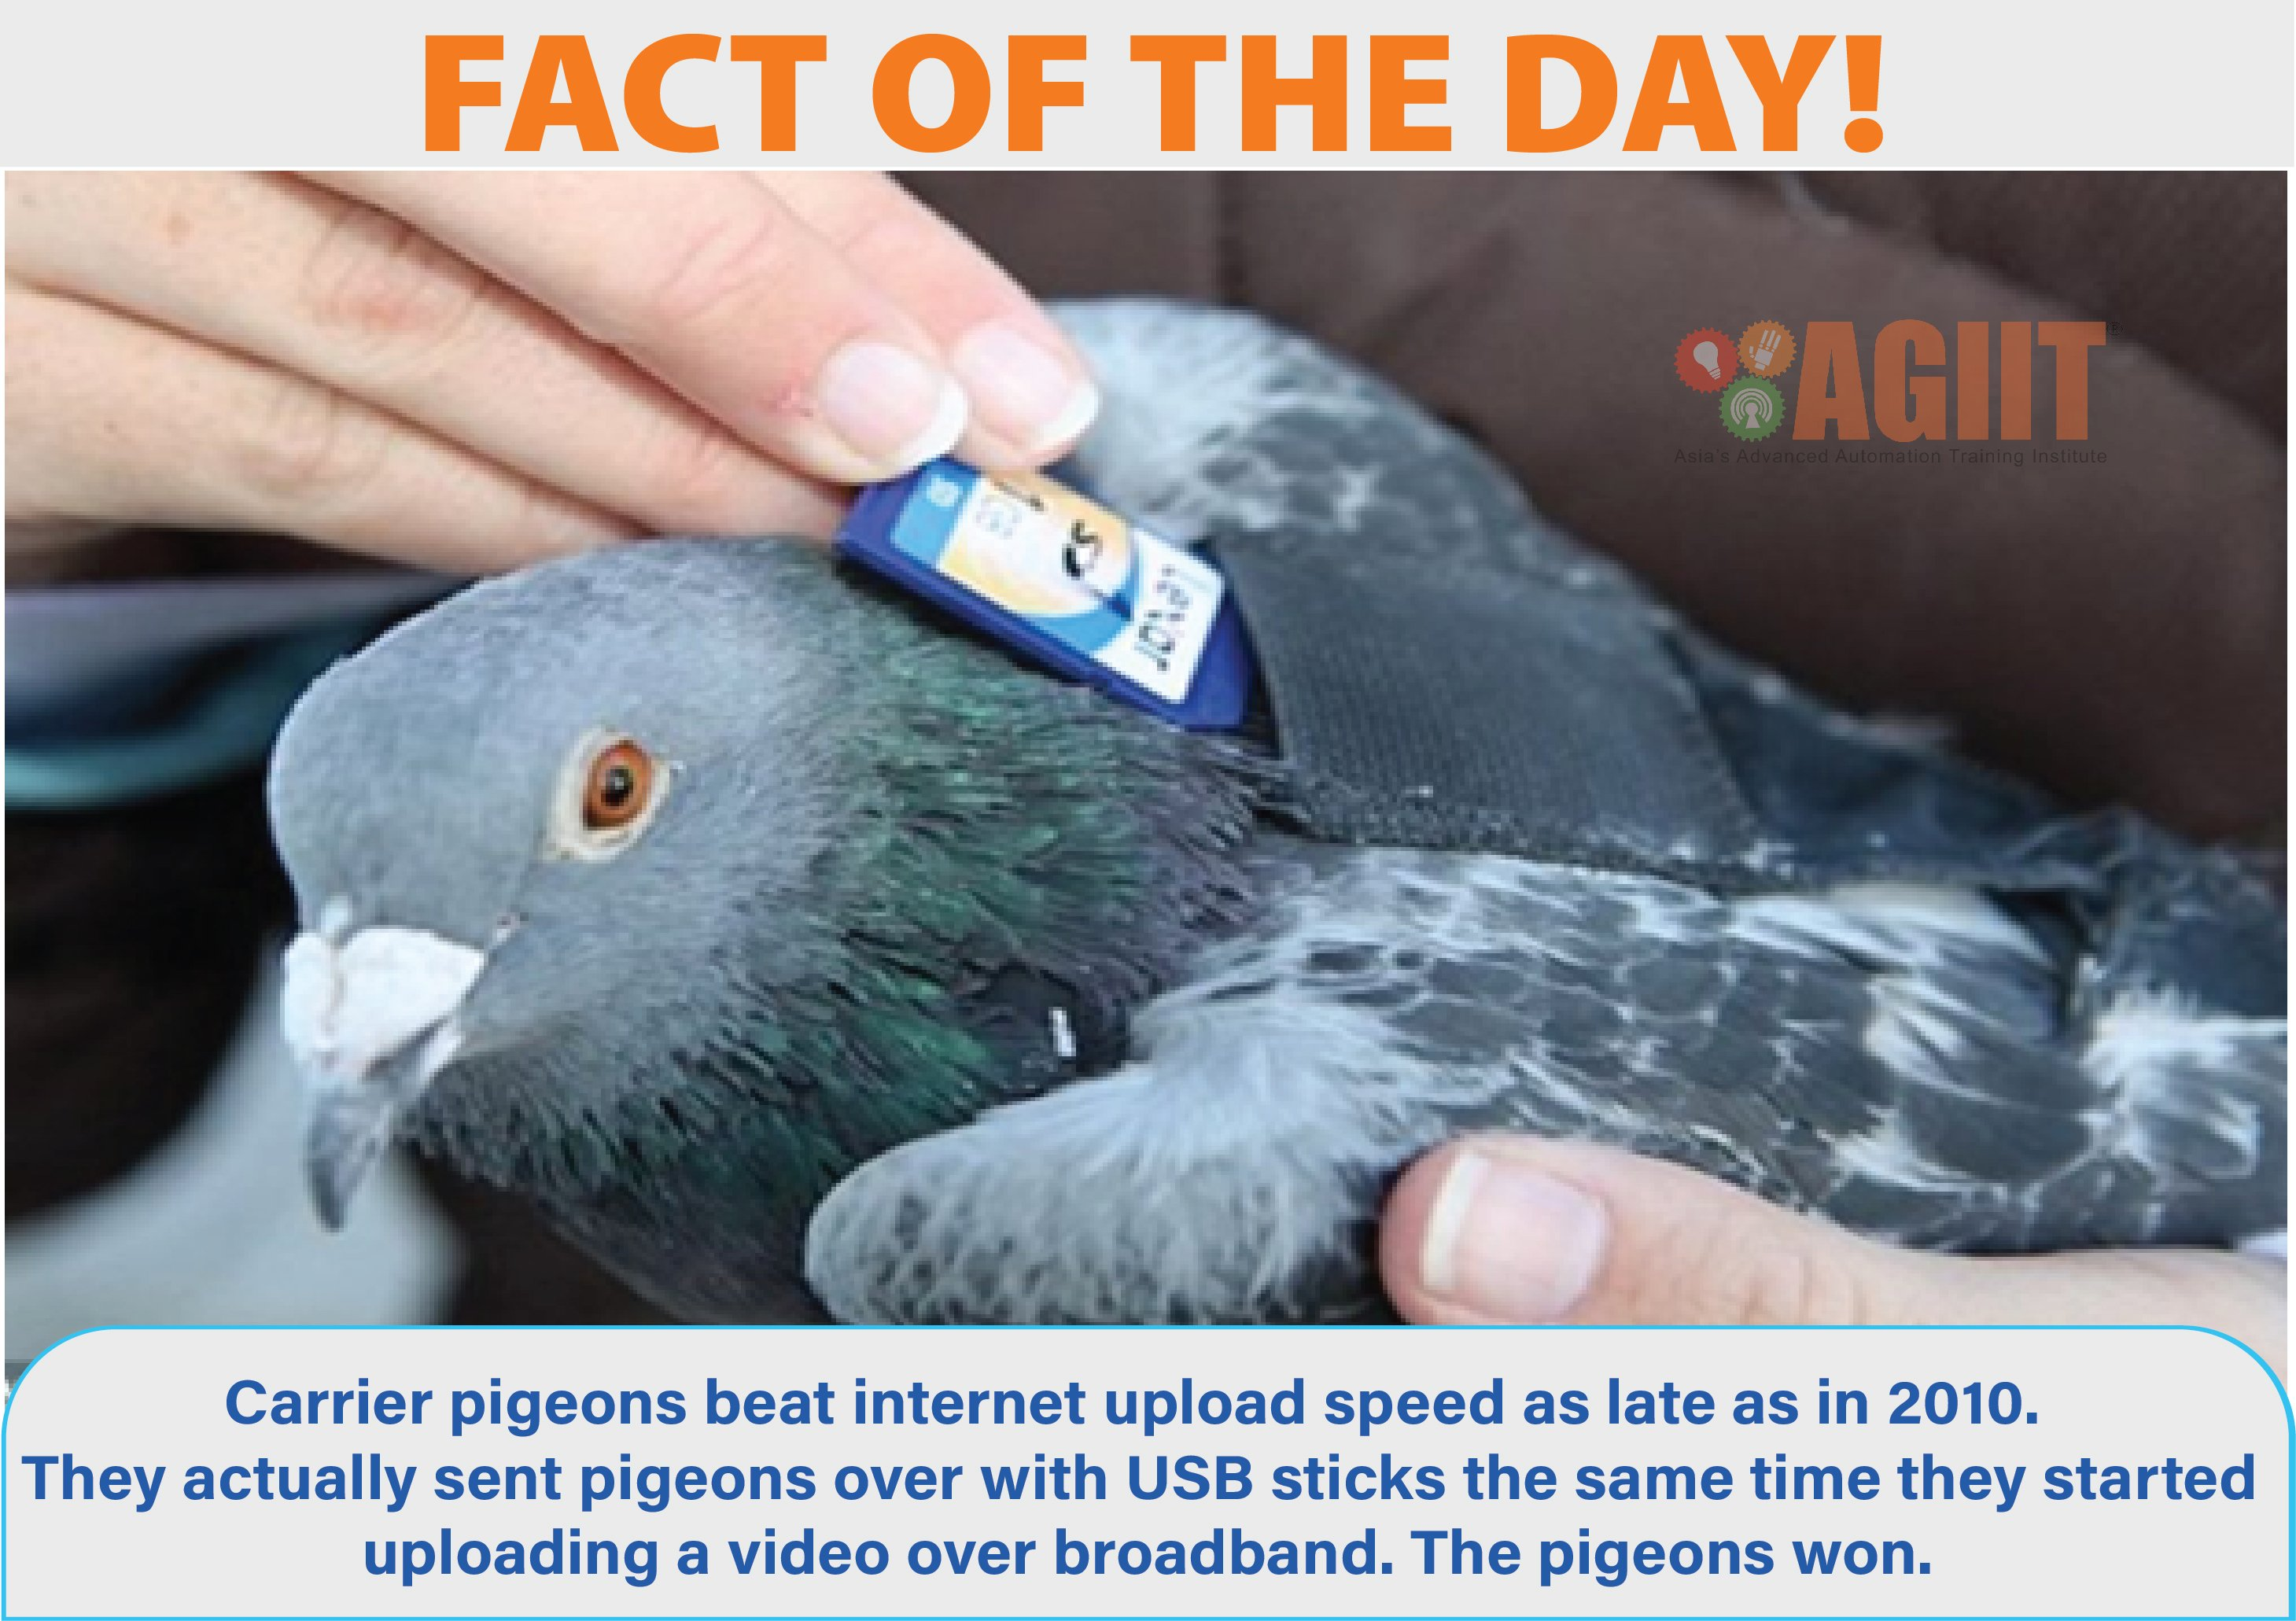

(2009)https://spectrum.ieee.org/carrier-pigeon-beats-internet-

A BBC news story today reported that a South African carrier pigeon named Winston carrying a 4GB memory stick was able to beat an equivalent ADSL service provided by South Africa's biggest web firm, Telkom SA, over a 60 mile "course."

The "race" was conducted by Unlimited IT, a Durban IT company, as a way to highlight its complaints about slow Internet service it claimed it was receiving from Telkom.

The 60 mile race course covered the distance from Unlimited IT's call center in the town of Howick and firm's office in Durban.

Winston took one hour and eight minutes to fly the course, and it took another hour to upload the data on to an Unlimited IT system.

Unlimited IT said that the ADSL transmission of the same data size was about 4% complete over the same time.

## **Algorithm Analysis**

There are usually multiple ways to solve the problem using a computer program.

For instance, there are several ways to sort items in an array - you can use merge sort, bubble sort, insertion sort, and so on.

All of these algorithms have their own pros and cons and the developer's job is to weigh them to be able to choose the **best algorithm** to use in any use case. **In other words, the main question is which algorithm to use to solve a specific problem when there exist multiple solutions to the problem**.

**Algorithm analysis** refers to the analysis of the complexity of different algorithms and finding the most efficient algorithm to solve the problem at hand.

**Big-O notation is a statistical measure used to describe the complexity of the algorithm.**

## **Big O Notation**

**How much time/memory does it take to run a function?**

    lots of conditions : speed of processor, do you run any other programs?, server?  

**How does the runtime of a function grow as the size of the input grows?**

runtime = time it takes to execute a piece of code

**Example 1**: Caluclute the sum of squres of numbers from 0 to n.

In [ ]:
def sum1(n):
   final_sum = 0
   for x in range(0, n+1):
       final_sum = final_sum + x ** 2

   return final_sum

In [ ]:
sum1(3)

14

In [ ]:
#
def sum2(n):
    result = n * (n + 1)*( 2 * n + 1) / 6
    return result

In [ ]:
sum2(3)

14.0

In [ ]:
%timeit sum1(3)

1.22 µs ± 149 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%timeit sum2(3)

153 ns ± 1.5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


**Big O Notation**

* Big-O defines a functions complexiy or bigerness.
* Big-O analysis is also named as asympotic analysis.
* Some of Big-O function as below:
* As type of input changes from costant(can be any number) through Exponential, Big-O complexity increases and calculation time increases.
* So, being in green area in Big-O complexity chart in coding, results most time effective and less time consuming softwares.

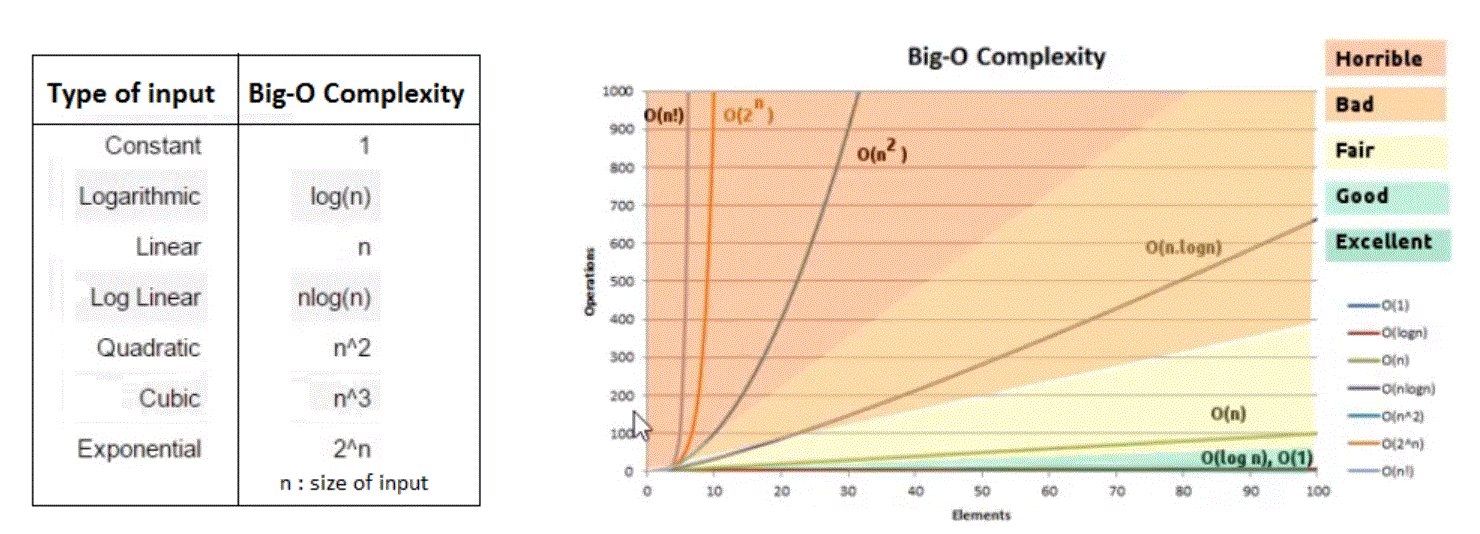

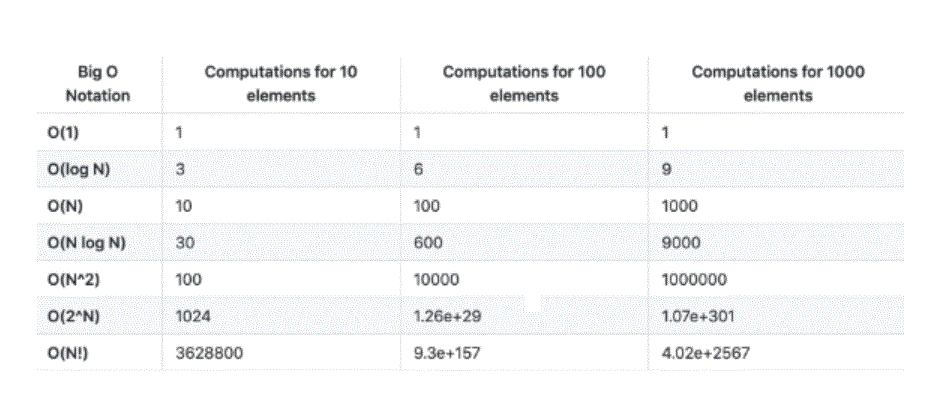

**Big-O / Omega / Teta**

* Big-O : Testing the code complexity in the worst case scenario
* Omega : Testing the code complexity in the best case scenario
* Tetam : Testing the code complexity in the mid case scenario

Example : Let's say we have a list containing 2,3,4 numbers in random order. Our aim is to find the Big-O rate of the algoritm that searches and find "2" and gives me the index of it.

* There are three possibility of order for the list: "4,3,2" or "3,2,4" or "2,3,4".

So, algoritm will find 2 quickly in 3rd possibility; in a mid time in 2nd possibility; latest in 1st possibility.

* Then, we can say that Big-O rate of this algoritm is 2 seconds, becasue it is 2 seconds according to the worst case scenario.


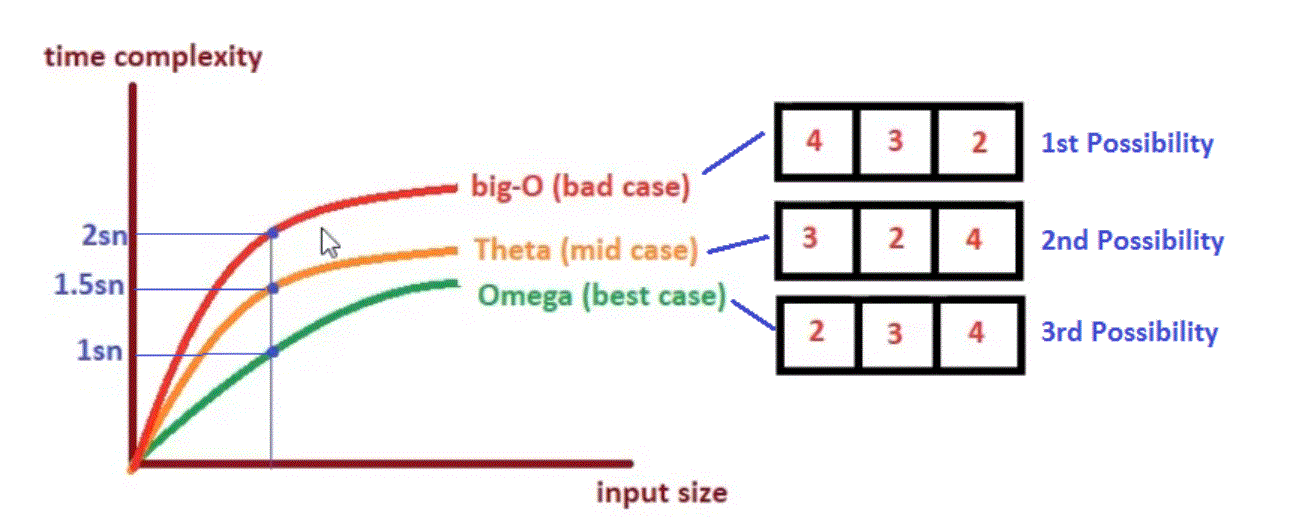

### **O(1) Constant Time**

* In this type, time complexity is not dependent on input size.
* Increasing or decreasing input size does not change output time complexity.

In below example, Big-O is contant for two lists because algorithm makes one operation for each.

In [ ]:
def take_first(my_list):
  return my_list[0]

In [ ]:
short_list = [13, 25, 42]
%timeit take_first(short_list)

76.1 ns ± 0.531 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
long_list = [42] * 10**8 # one hundred million items
%timeit take_first(long_list)

76.2 ns ± 0.895 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
len(long_list)

If you draw a line plot with the varying size of the items input on the X-axis and the number of steps on the Y-axis, you will get a straight line.

Let's create a short script to help us visualize this. No matter the number of inputs, the number of executed steps remains the same:

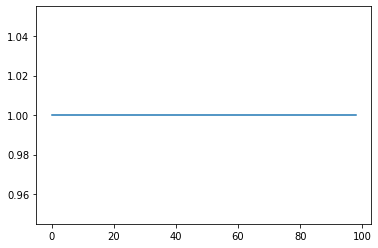

In [ ]:
import matplotlib.pyplot as plt
steps = []
def constant(n):
    return 1

for i in range(1, 100):
    steps.append(constant(i))
plt.plot(steps)

 ### **linear: O(n)**

 * In this type, time complexity increases linearly with input size.

In below example: if list size is 2, then values_of_list function will call print function 2 times.

If list size is 5, then values_of_list function will call print function 5 times.

So we can say that, Big-O of values_of_list algorithm is Linear.

In [ ]:
def values_of_list(list1):
    for each in list1:
        print(each)

list1 = [1,2]
list2 = [3,4,5,6,7]

print("Values of list1")
values_of_list(list1)

print("Values of list2")
values_of_list(list2)

Values of list1
1
2
Values of list2
3
4
5
6
7


Let's quickly create a plot for the linear complexity algorithm with the number of inputs on the x-axis and the number of steps on the y-axis:

Text(0, 0.5, 'Steps')

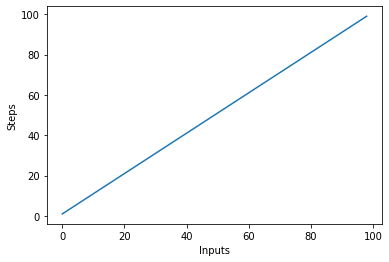

In [ ]:
import matplotlib.pyplot as plt
steps = []
def linear(n):
    return n

for i in range(1, 100):
    steps.append(linear(i))

plt.plot(steps)
plt.xlabel('Inputs')
plt.ylabel('Steps')

An important thing to note is that with large inputs, constants tend to lose value. This is why we typically remove constants from Big-O notation, and an expression such as O(2n) is usually shortened to O(n).

Both O(2n) and O(n) are linear - the linear relationship is what matters, not the concrete value.

For example, let's modify the vlaues_of_list():

In [ ]:
def values_of_list(list1):
    for each in list1:
        print(each)

    for each in list1:
        print(each)

values_of_list([4,5,6,8])


There are two for-loops that iterate over the input items list. Therefore the complexity of the algorithm becomes O(2n), however in the case of infinite items in the input list, the twice of infinity is still equal to infinity. We can ignore the constant 2 (since it is ultimately insignificant) and the complexity of the algorithm remains O(n).

Let's visualize this new algorithm by plotting the inputs on the X-axis and the number of steps on the Y-axis:

In [ ]:
import matplotlib.pyplot as plt
steps = []
def linear(n):
    return 2 * n

for i in range(1, 100):
    steps.append(linear(i))

plt.plot(steps)
plt.xlabel('Inputs')
plt.ylabel('Steps')

### **Quadratic Complexity - O(n²)**

The complexity of an algorithm is said to be quadratic when the steps required to execute an algorithm are a quadratic function of the number of items in the input. Quadratic complexity is denoted as O(n²):

In [ ]:
def quadratic_bigo(items):
    for item in items:
        for item2 in items:
            print(item, ' ' ,item2)

quadratic_bigo([4, 5, 6, 8])

4   4
4   5
4   6
4   8
5   4
5   5
5   6
5   8
6   4
6   5
6   6
6   8
8   4
8   5
8   6
8   8


Text(0, 0.5, 'Steps')

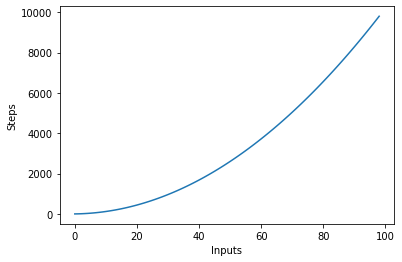

In [ ]:
import matplotlib.pyplot as plt
steps = []
def linear(n):
    return n ** 2

for i in range(1, 100):
    steps.append(linear(i))

plt.plot(steps)
plt.xlabel('Inputs')
plt.ylabel('Steps')

### **Cubic Big-O / O(n^3)**

* In this type, If input size is n, then operation time will be n^3.

In below example: cubic_big_o algorithm calls 27 times print function with an input of 3 size list.

So time complexity of this algorithm is cubic.

In [ ]:
def cubic_big_o(list1):
    for item1 in list1:
        for item2 in list1:
            for item3 in list1:
                print(item1, item2, item3)

cubic_big_o([1,2,3])

1 1 1
1 1 2
1 1 3
1 2 1
1 2 2
1 2 3
1 3 1
1 3 2
1 3 3
2 1 1
2 1 2
2 1 3
2 2 1
2 2 2
2 2 3
2 3 1
2 3 2
2 3 3
3 1 1
3 1 2
3 1 3
3 2 1
3 2 2
3 2 3
3 3 1
3 3 2
3 3 3


Text(0, 0.5, 'Steps')

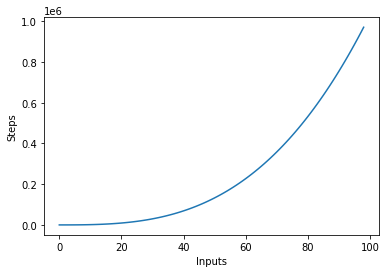

In [ ]:
import matplotlib.pyplot as plt
steps = []
def linear(n):
    return n ** 3

for i in range(1, 100):
    steps.append(linear(i))

plt.plot(steps)
plt.xlabel('Inputs')
plt.ylabel('Steps')

### **Conclusion**

The Big-O notation is the standard metric used to measure the complexity of an algorithm. We studied what Big-O notation is and how it can be used to measure the complexity of a variety of algorithms.

We also studied different types of Big-O functions with the help of different Python examples.

Finally, we briefly reviewed the worst and the best case complexity along with the space complexity.

**For further reading please refer**:

https://www.integralist.co.uk/posts/calculating-bigo/

https://www.integralist.co.uk/posts/algorithmic-complexity-in-python/

# **12.1 Selection Sort**

**A sorting algorithm rearranges the elements of a collection so that they are stored in sorted order.**

The selection sort algorithm sorts a list by repeatedly finding the smallest element of the unsorted tail region and moving it to the front.

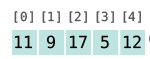

In [ ]:
## Sorts a list, using selection sort.

def selectionSort(values) :
   for i in range(len(values)) :
      minPos = minimumPosition(values, i)
      temp = values[minPos]  # swap the two elements
      values[minPos] = values[i]
      values[i] = temp

def minimumPosition(values, start) :
   minPos = start
   for i in range(start + 1, len(values)) :
      if values[i] < values[minPos] :
         minPos = i

   return minPos

In [ ]:
from random import randint
#from selectionsort import selectionSort

n = 20
values = []
for i in range(n) :
   values.append(randint(1, 100))
print(values)
selectionSort(values)
print(values)


## **sort method invoked on the list**

In [ ]:
from random import randint

n = 20
values = []
for i in range(n) :
   values.append(randint(1, 100))
print(values)
print("")
values.sort()
print(values)

[31, 47, 48, 91, 29, 96, 14, 52, 19, 7, 24, 52, 32, 24, 41, 21, 86, 51, 2, 4]

[2, 4, 7, 14, 19, 21, 24, 24, 29, 31, 32, 41, 47, 48, 51, 52, 52, 86, 91, 96]


# **12.2 Profiling the Selection Sort Algorithm**

In [ ]:
##
#  This program measures how long it takes to sort a list of a
#  user-specified size with the selection sort algorithm.
#

from random import randint
# from selectionsort import selectionSort
from time import time

firstSize = int(input("Enter first list size: "))
numberOfLists = int(input("Enter number of lists: "))

for k in range(1, numberOfLists + 1) :
   size = firstSize * k
   values = []
   # Construct random list.
   for i in range(size) :
      values.append(randint(1, 100))

   startTime = time()
   #selectionSort(values)
   values.sort()
   endTime = time()

   print("Size: %d Elapsed time: %.3f seconds" % (size, endTime - startTime))

As you can see, when you double the size of the data set, it takes about four times as long to sort it.

# **12.3 Analyzing the Performance of the Selection Sort Algorithm**

https://medium.com/dataseries/how-to-calculate-time-complexity-with-big-o-notation-9afe33aa4c46

**Computer scientists use big-Oh notation to describe how fast a function grows.**

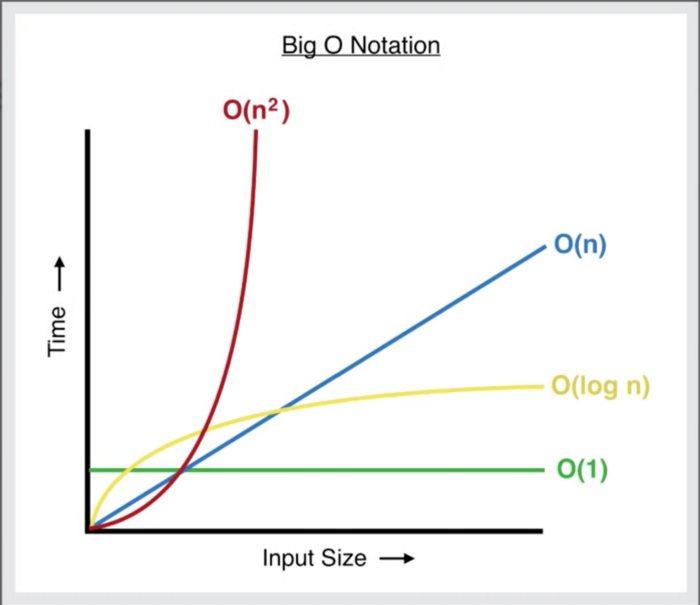

# **Review I**

**Sorting List** default Alphabetically

## What is a Sorting Algorithm?

Sorting algorithms are a set of instructions that take an array or list as an input and arrange the items into a particular order.

Sorts are most commonly in numerical or a form of alphabetical (called lexicographical) order, and can be in ascending (A-Z, 0-9) or descending (Z-A, 9-0) order.

## Why Sorting Algorithms are Important?

**The different sorting algorithms are a perfect showcase of how algorithm design can have such a strong effect on program complexity, speed, and efficiency.**

## Some Common Sorting Algorithms

Some of the most common sorting algorithms are:

    Bubble Sort
    Selection Sort
    Insertion Sort
    Merge Sort
    Quick Sort

# **Review II Bubble Sort**

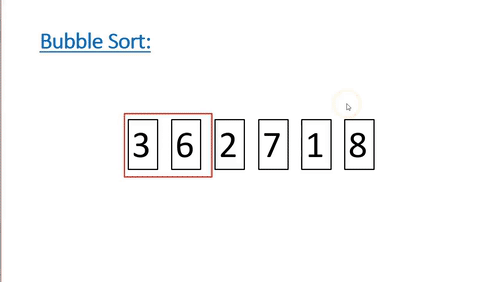

In [ ]:
# Python program for implementation of Bubble Sort

def bubbleSort(arr):
    n = len(arr)
    swapped = False
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j] > arr[j + 1]:
                swapped = True
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

        if not swapped:
           return

In [ ]:
##
#  This program measures how long it takes to sort a list of a
#  user-specified size with the selection sort algorithm.
#

from random import randint
from time import time

firstSize = int(input("Enter first list size: "))
numberOfLists = int(input("Enter number of lists: "))

for k in range(1, numberOfLists + 1) :
   size = firstSize * k
   values = []
   # Construct random list.
   for i in range(size) :
      values.append(randint(1, 100))

   startTime = time()
   bubbleSort(values)
   endTime = time()

   print("Size: %d Elapsed time: %.3f seconds" % (size, endTime - startTime))

# **Review III Insertion Sort**

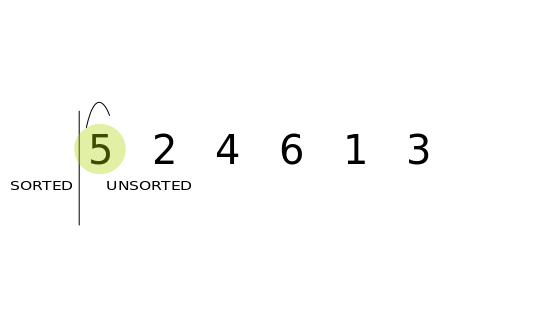

* Take our unsorted sequence and divide it into two sub lists - sorted & unsorted ( sorted list would have a lengeth of 1, and then all the rest of the items will go into that unsorted sub list

* Take the item in the very left position of that unsorted sequence and move it into the sorted sub list;

* Once it's in that sorted sub list we'll compare that value to the value to its immediate left.  If that value to the immediate left is higher than the item that we're trying to sort then we change positions of those two items

* Continue until we find an item that is not higher than the item we're trying to sort

Given a list, take the current element and insert it at the appropriate position of the list, adjusting the list every time you insert. It is similar to arranging the cards in a Card game.

**Time Complexity** of selection sort is always n(n - 1)/2, whereas insertion sort has better time complexity as its worst case complexity is n(n - 1)/2. Generally it will take lesser or equal comparisons then n(n - 1)/2.

In [ ]:
# Function to do insertion sort
def insertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j] :
                arr[j+1] = arr[j]
                j -= 1
        arr[j+1] = key


In [ ]:
##
#  This program measures how long it takes to sort a list of a
#  user-specified size with the selection sort algorithm.
#

from random import randint
from time import time

firstSize = int(input("Enter first list size: "))
numberOfLists = int(input("Enter number of lists: "))

for k in range(1, numberOfLists + 1) :
   size = firstSize * k
   values = []
   # Construct random list.
   for i in range(size) :
      values.append(randint(1, 100))

   startTime = time()
   insertionSort(values)
   endTime = time()

   print("Size: %d Elapsed time: %.3f seconds" % (size, endTime - startTime))

# **Review IV Selection Sort**

**Selection sort is also quite simple but frequently outperforms bubble sort.**

Selection Sort is one of the simplest sorting algorithms. This algorithm gets its name from the way it iterates through the array: it selects the current smallest element, and swaps it into place.

Here's how it works:

1. Find the smallest element in the array and swap it with the first element.
2. Find the second smallest element and swap with with the second element in the array.
3. Find the third smallest element and swap wit with the third element in the array.
4. Repeat the process of finding the next smallest element and swapping it into the correct position until the entire array is sorted.

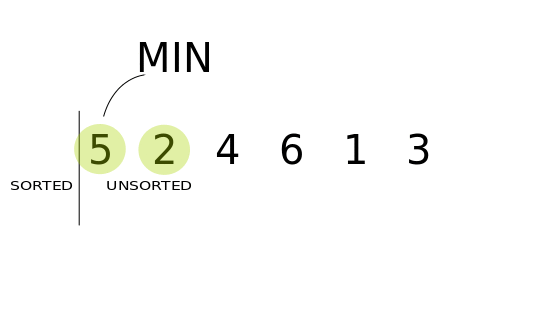

In [ ]:
#@title SelectionSort
##
#  The selectionSort function sorts a list using the selection sort algorithm.
#

def selectionSort(values) :
   for i in range(len(values)) :
      minPos = minimumPosition(values, i)
      temp = values[minPos]  # swap the two elements
      values[minPos] = values[i]
      values[i] = temp

## Finds the smallest element in a tail range of the list.

def minimumPosition(values, start) :
   minPos = start
   for i in range(start + 1, len(values)) :
      if values[i] < values[minPos] :
         minPos = i

   return minPos

In [ ]:
#@title SelectionDemo
from random import randint
# from selectionsort import selectionSort

n = 20
values = []
for i in range(n) :
   values.append(randint(1, 100))
print(values)
selectionSort(values)
print(values)


In [ ]:
#@title SelectionSort Run Time
##
#  This program measures how long it takes to sort a list of a
#  user-specified size with the selection sort algorithm.
#

from random import randint
# from selectionsort import selectionSort
from time import time

firstSize = int(input("Enter first list size: "))
numberOfLists = int(input("Enter number of lists: "))

for k in range(1, numberOfLists + 1) :
   size = firstSize * k
   values = []
   # Construct random list.
   for i in range(size) :
      values.append(randint(1, 100))

   startTime = time()
   selectionSort(values)
   endTime = time()

   print("Size: %d Elapsed time: %.3f seconds" % (size, endTime - startTime))

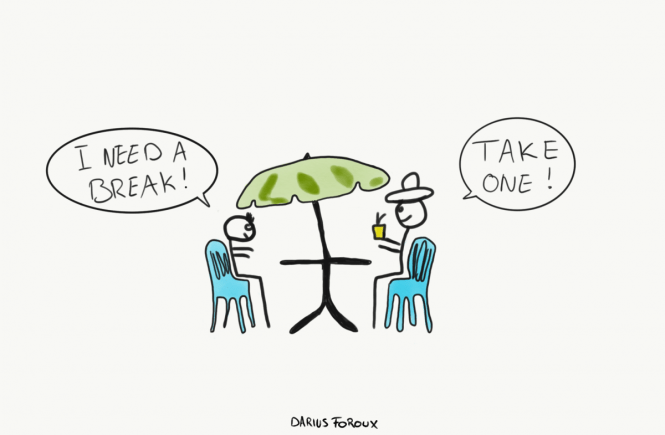

# **Review V**

## Trade-Offs of Algorithms


When using different algorithms some questions have to be asked.

    How big is the collection being sorted?
    How much memory is at disposal to be used?
    Does the collection need to grow?

The answers to these questions may determine what algorithm is going to work best for the situation. Some algorithms like merge sort may need a lot of space to run, while insertion sort is not always the fastest but it doesn't require many resources to run.

You should determine what the requirements of the system are and its limitations before deciding what algorithm to use.

## Classification of a Sorting Algorithm

Sorting algorithms can be categorized based on the following parameters:

1. Based on Number of Swaps or Inversion This is the number of times the algorithm swaps elements to sort the input.  Selection Sort  requires the minimum number of swaps.

2. Based on Number of Comparisons This is the number of times the algorithm compares elements to sort the input. Using Big-O notation, the sorting algorithm examples listed above require at least  O(nlogn) comparisons in the best case and  O(n^2)  comparisons in the worst case for most of the outputs.

3. Based on Recursion or Non-Recursion Some sorting algorithms, such as  Quick Sort , use recursive techniques to sort the input. Other sorting algorithms, such as  Selection Sort  or  Insertion Sort , use non-recursive techniques. Finally, some sorting algorithm, such as  Merge Sort , make use of both recursive as well as non-recursive techniques to sort the input.

4. Based on Stability Sorting algorithms are said to be  stable  if the algorithm maintains the relative order of elements with equal keys. In other words, two equivalent elements remain in the same order in the sorted output as they were in the input.

5. Insertion sort ,  Merge Sort , and  Bubble Sort  are stable

6. Heap Sort  and  Quick Sort  are not stable

7. Based on Extra Space Requirement Sorting algorithms are said to be  in place  if they require a constant  O(1)  extra space for sorting.

8. Insertion sort  and  Quick-sort  are  in place  sort as we move the elements about the pivot and do not actually use a separate array which is NOT the case in merge sort where the size of the input must be allocated beforehand to store the output during the sort.

9. Merge Sort  is an example of  out place  sort as it require extra memory space for its operations.

# **12.4 Merge Sort**

**Merge sort is a perfectly elegant example of a Divide and Conquer algorithm.**


It simple uses the 2 main steps of such an algorithm:

(1) Continuously divide the unsorted list until you have N sublists, where each sublist has 1 element that is “unsorted” and N is the number of elements in the original array.

(2) Repeatedly merge i.e conquer the sublists together 2 at a time to produce new sorted sublists until all elements have been fully merged into a single sorted array.


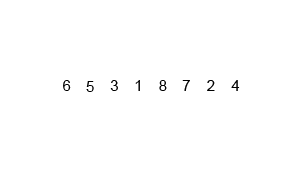

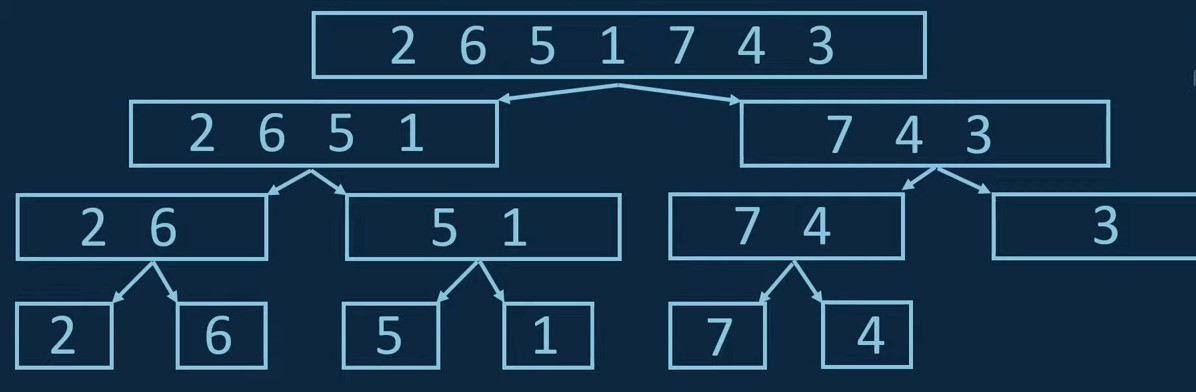

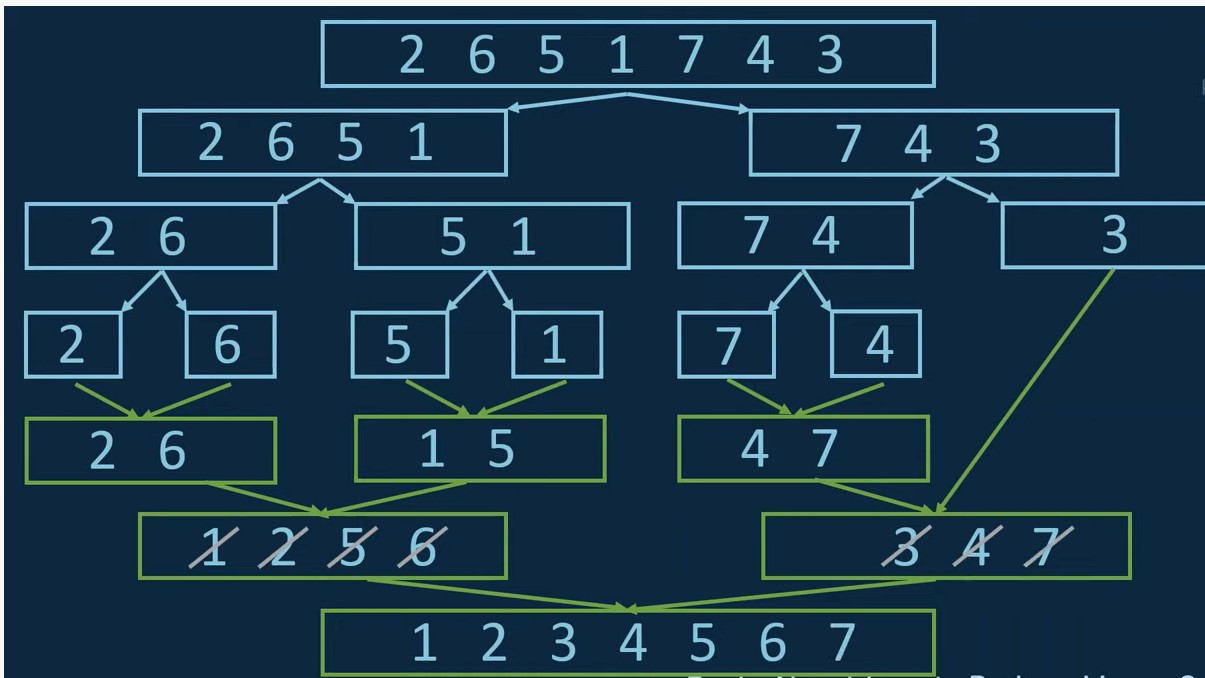

Merge Sort is recursive ( methos that calls itsself)

Divide and Conquer Algorithm

Very efficient for large data sets

**Merge sort is an O(n log(n)) algorithm. The n log(n) function grows much more slowly than n2.**

https://www.khanacademy.org/computing/computer-science/algorithms/merge-sort/a/analysis-of-merge-sort

Timsort is a hybrid stable sorting algorithm, derived from merge sort and insertion sort, designed to perform well on many kinds of real-world data.

It was implemented by Tim Peters in 2002 for use in the Python programming language. The algorithm finds subsequences of the data that are already ordered (runs) and uses them to sort the remainder more efficiently. This is done by merging runs until certain criteria are fulfilled. Timsort has been Python's standard sorting algorithm since version 2.3. It is also used to sort arrays of non-primitive type in Java SE 7,[4] on the Android platform,[5] in GNU Octave,[6] on V8,[7] Swift,[8] and Rust.[9]

https://en.wikipedia.org/wiki/Timsort

## Merging two sorted sub lists

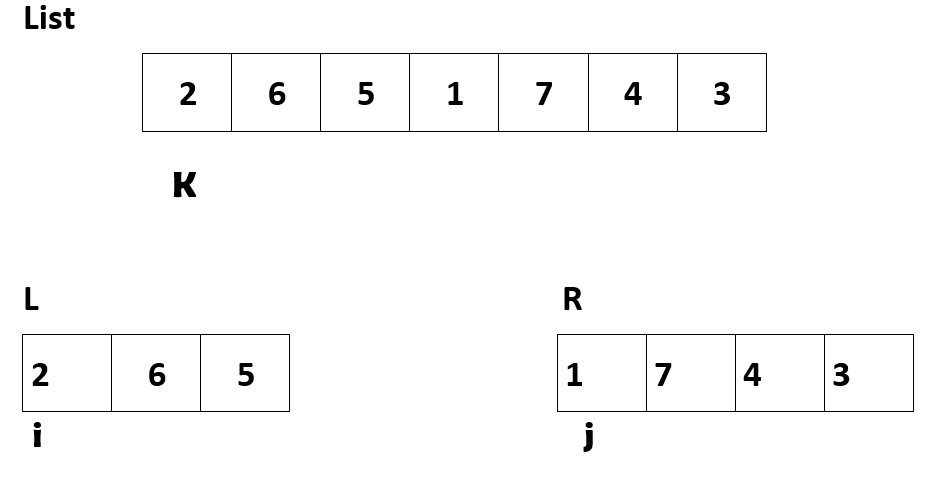

In [ ]:
# Python program for implementation of MergeSort
def mergeSort(arr):
    if len(arr) > 1:
       mid = len(arr)//2
       L = arr[:mid]
       R = arr[mid:]
       mergeSort(L)
       mergeSort(R)

       i = j = k = 0

       while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

       while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

       while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1



In [ ]:
##
#  This program measures how long it takes to sort a list of a
#  user-specified size with the selection sort algorithm.
#

from random import randint
from time import time

firstSize = int(input("Enter first list size: "))
numberOfLists = int(input("Enter number of lists: "))

for k in range(1, numberOfLists + 1) :
   size = firstSize * k
   values = []
   # Construct random list.
   for i in range(size) :
      values.append(randint(1, 100))

   startTime = time()
   mergeSort(values)
   endTime = time()

   print("Size: %d Elapsed time: %.3f seconds" % (size, endTime - startTime))

# **Quick Sort**

Quick sort is also a divide and conquer algorithm like merge sort.

Although it’s a bit more complicated, in most standard implementations it performs significantly faster than merge sort and rarely reaches its worst case complexity of O(n²).

It has 3 main steps:

    (1) We first select an element which we will call the pivot from the array.
    (2) Move all elements that are smaller than the pivot to the left of the pivot; move all elements that are larger than the pivot to the right of the pivot. This is called the partition operation.
    (3) Recursively apply the above 2 steps separately to each of the sub-arrays of elements with smaller and bigger values than the last pivot.


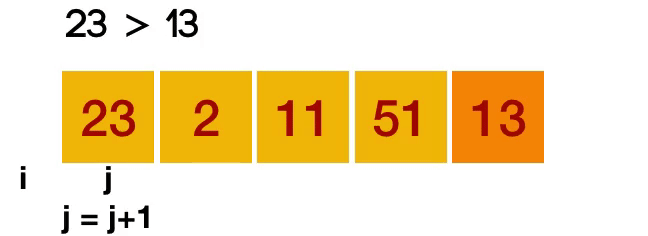

# **12.5 Analyzing the Merge Sort Algorithm**

https://www.khanacademy.org/computing/computer-science/algorithms/merge-sort/a/divide-and-conquer-algorithms

In [ ]:
def bubble_sort(list):
    def swap(i, j):
        list[i], list[j] = list[j], list[i]

    n = len(list)
    swapped = True

    x = -1
    while swapped:
        swapped = False
        x = x + 1
        for i in range(1, n-x):
            if list[i - 1] > list[i]:
                swap(i - 1, i)
                swapped = True

    return list

In [ ]:
def selection_sort(list):
    for i in range(len(list)):
        minimum = i

        for j in range(i + 1, len(list)):
            # Select the smallest value
            if list[j] < list[minimum]:
                minimum = j

        # Place it at the front of the
        # sorted end of the array
        list[minimum], list[i] = list[i], list[minimum]

    return list

In [ ]:
def insertion_sort(list) :
    for i in range(1, len(list)):
        j = i
        while list[j-1] > list[j] and j > 0 :
          list[j -1]  , list[j] = list[j], list[j-1]
          j-= 1

In [ ]:
def merge_sort(list):

     # a list of 0 or one elment is sorted, by definition.
    if len(list) <= 1:
        return list

    if len(list) > 1:
        left_list = list[ :len(list)//2]
        right_list = list[len(list)//2:]

        # recursion
        merge_sort(left_list)
        merge_sort(right_list)

        #merge
        i = 0 # i is the left most index of the left list
        j = 0 # j is the left most indes of the right list
        k = 0 # merged list index
        while i < len(left_list) and j < len(right_list):
            if left_list[i] < right_list[j]:
                list[k] = left_list[i]
                i += 1
                k += 1
            else:
                list[k] = right_list[j]
                j += 1
                k += 1

        while i < len(left_list):
             list[k] = left_list[i]
             i += 1
             k += 1

        while j < len(right_list):
             list[k] = right_list[j]
             j += 1
             k += 1

In [ ]:
def quick_sort(list):
    if len(list)> 1:
        pivot=list.pop()
        grtr_lst, equal_lst, smlr_lst = [], [pivot], []
        for item in list:
            if item == pivot:
                equal_lst.append(item)
            elif item > pivot:
                grtr_lst.append(item)
            else:
                smlr_lst.append(item)
        return (quick_sort(smlr_lst) + equal_lst + quick_sort(grtr_lst))
    else:
        return list

In [ ]:
##
#  This program measures how long it takes to sort a list of a
#  user-specified size with the selection sort algorithm.
#

from random import randint
from time import time

firstSize = int(input("Enter first list size: "))
numberOfLists = int(input("Enter number of lists: "))

for k in range(1, numberOfLists + 1) :
   size = firstSize * k
   v = []

   # Construct random list.
   for i in range(size) :
      v.append(randint(1, 100))

   startTime = time()
   bubble_sort(v)
   endTime = time()

   print("Size: %d Elapsed time for bubble Sort Algorithm: %.3f seconds" % (size, endTime - startTime))

print('__________')


for k in range(1, numberOfLists + 1) :
   size = firstSize * k
   v1 = []

   # Construct random list.
   for i in range(size) :
      v1.append(randint(1, 100))

   startTime = time()
   selection_sort(v1)
   endTime = time()

   print("Size: %d Elapsed time for Selection Sort Algorithm: %.3f seconds" % (size, endTime - startTime))

print('__________')


for k in range(1, numberOfLists + 1) :
   size = firstSize * k
   v2 = []

   # Construct random list.
   for i in range(size) :
      v2.append(randint(1, 100))

   startTime = time()
   insertion_sort(v2)
   endTime = time()

   print("Size: %d Elapsed time for Insertion Sort Algorithm: %.3f seconds" % (size, endTime - startTime))

print('__________')


for k in range(1, numberOfLists + 1) :
   size = firstSize * k
   v3 = []

   # Construct random list.
   for i in range(size) :
      v3.append(randint(1, 100))

   startTime = time()
   merge_sort(v3)
   endTime = time()

   print("Size: %d Elapsed time for Merge Sort Algorithm: %.3f seconds" % (size, endTime - startTime))

print('__________')


for k in range(1, numberOfLists + 1) :
   size = firstSize * k
   v4 = []

   # Construct random list.
   for i in range(size) :
      v4.append(randint(1, 100))

   startTime = time()
   merge_sort(v4)
   endTime = time()

   print("Size: %d Elapsed time for Quick Sort Algorithm: %.3f seconds" % (size, endTime - startTime))

Enter first list size: 1000
Enter number of lists: 3
Size: 1000 Elapsed time for bubble Sort Algorithm: 0.075 seconds
Size: 2000 Elapsed time for bubble Sort Algorithm: 0.314 seconds
Size: 3000 Elapsed time for bubble Sort Algorithm: 0.733 seconds
__________
Size: 1000 Elapsed time for Selection Sort Algorithm: 0.033 seconds
Size: 2000 Elapsed time for Selection Sort Algorithm: 0.131 seconds
Size: 3000 Elapsed time for Selection Sort Algorithm: 0.313 seconds
__________
Size: 1000 Elapsed time for Insertion Sort Algorithm: 0.096 seconds
Size: 2000 Elapsed time for Insertion Sort Algorithm: 0.448 seconds
Size: 3000 Elapsed time for Insertion Sort Algorithm: 0.991 seconds
__________
Size: 1000 Elapsed time for Merge Sort Algorithm: 0.007 seconds
Size: 2000 Elapsed time for Merge Sort Algorithm: 0.012 seconds
Size: 3000 Elapsed time for Merge Sort Algorithm: 0.019 seconds
__________
Size: 1000 Elapsed time for Quick Sort Algorithm: 0.006 seconds
Size: 2000 Elapsed time for Quick Sort Algor

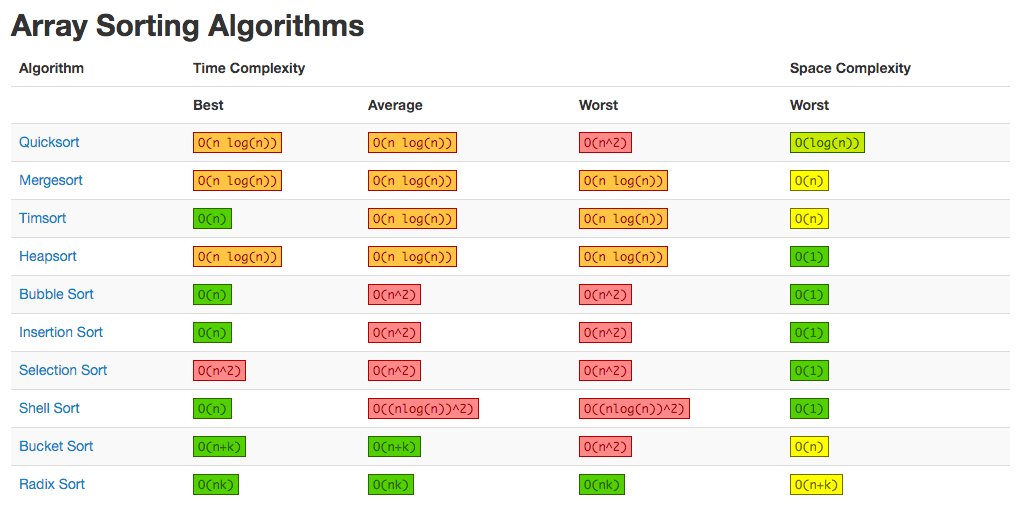

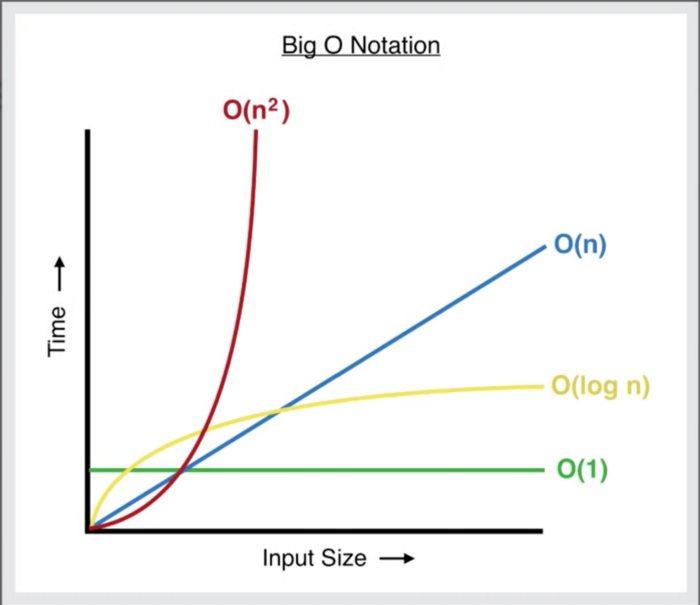

# **12.6 Searching**

Searching for an element in a list is an extremely common task. As with sorting, the right choice of algorithms can make a big difference.

## **12.6.1 Linear Search**

Suppose you need to find your friend’s telephone number. You **look up the friend’s name** in the telephone book, and naturally you can find it quickly, because the telephone book is sorted alphabetically.

Now suppose you have a **telephone number** and you must know to what party it belongs. You could of course call that number, but suppose nobody picks up on the other end. You could look through the telephone book, a number at a time, until you find the number. That would obviously be a tremendous amount of work, and you would have to be desperate to attempt it.

**A linear search examines all values in a list until it finds a match or reaches the end.**

If you want to find a number in a sequence of values in arbitrary order, there is nothing you can do to speed up the search. You must simply look through all elements until you have found a match or until you reach the end. This is called a **linear or sequential search**. It’s the algorithm used by Python’s in operator when determining whether a given element is contained in a list.

**A linear search locates a value in a list in O(n) steps.**

In [ ]:
def linear_search_dy(list, target) :
    for i in range(len(list)) :
        if list[i] == target :
            return i
    return -1

In [ ]:
import random
def randomlist(n):
    list = []
    for i in range (n):
        list.append(random.randrange(0,n))
    return list

In [ ]:
list = randomlist(int(input("How many numbers in the list: ")))
target = int(input("which number are you look for: "))
print(linear_search_dy(list, target))
print(list)

How many numbers in the list: 30
which number are you look for: 5
10
[28, 28, 12, 29, 13, 13, 23, 24, 23, 25, 5, 17, 27, 23, 29, 13, 11, 19, 13, 4, 25, 10, 23, 21, 0, 18, 5, 26, 24, 26]


## **12.6.2 Binary Search**

A binary search locates a value in a sorted list by determining whether the value occurs in the first or second half, then repeating the search in one of the halves.

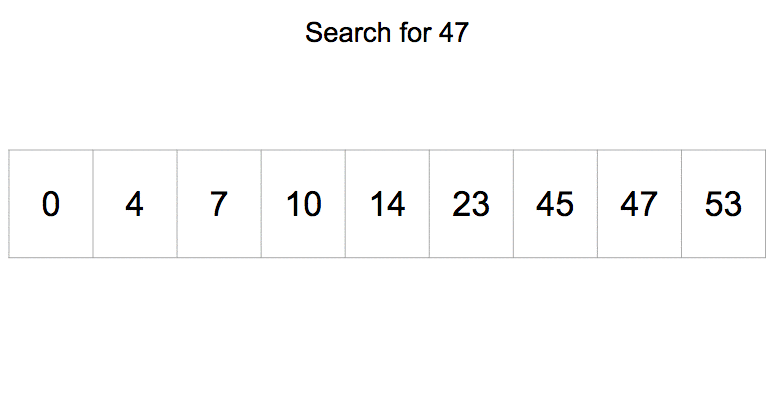

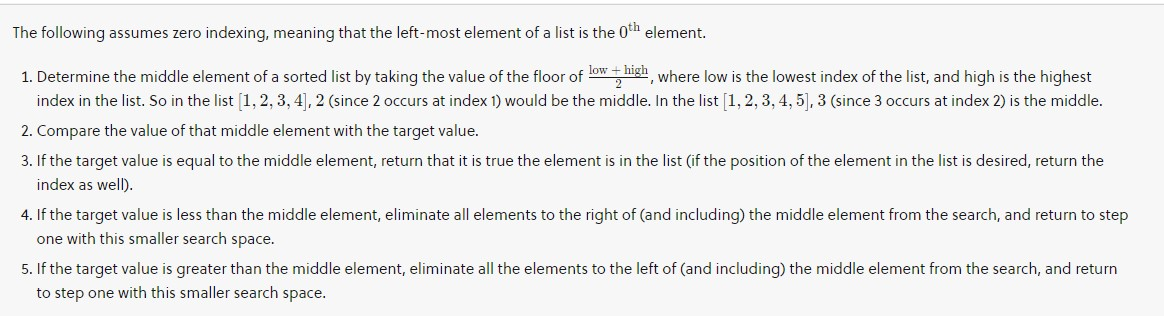

**A limitation of binary search is that it can only search in a pre-sorted list. If the list is not pre-sorted, binary search will not work. Linear search may be a better choice of search algorithm for an unsorted list.**

In [ ]:
def binary_search_dy(list, target): # Binary search can be implemented iteratively, loops to reapeat
        first = 0
        last = len(list)-1

        while first<=last:
            #note: Use of // indicates floor division. Ex. 5//2 = 2
            midpoint = (first + last)//2
            if list[midpoint] == target:
                return midpoint
            else:
                if target < list[midpoint]:
                    last = midpoint-1
                else:
                    first = midpoint+1

        return None

In [ ]:
x = randomlist(int(input("How many numbers in the list: ")))

print(binary_search_dy(x, 4))
print(binary_search_dy(x, 30))
print(binary_search_dy(x, 57))

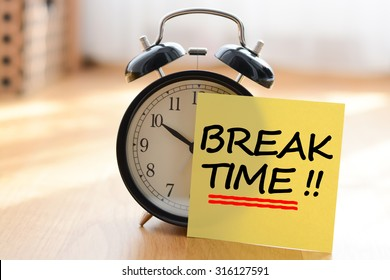

# **12.7 Problem Solving: Estimating the Running Time of an Algorithm**

## Algorithm Analysis with Big-O Notation

Big-O notation is a metrics used to find algorithm complexity. Basically, Big-O notation signifies the relationship between the input to the algorithm and the steps required to execute the algorithm.

It is denoted by a big "O" followed by opening and closing parenthesis. Inside the parenthesis, the relationship between the input and the steps taken by the algorithm is presented using "n".

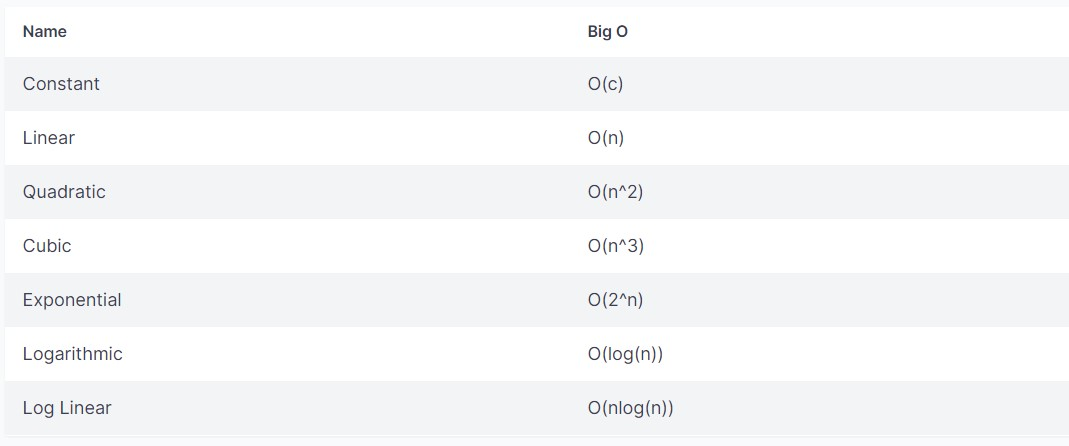

## **12.7.1 Linear Time**

**A loop with n iterations has O(n) running time if each step consists of a fixed number of actions.**

In [ ]:
def linear_algo(items):
    for item in items:
        print(item)

linear_algo([4, 5, 6, 8])

The complexity of the linear_algo function is linear in the above example since the number of iterations of the for-loop will be equal to the size of the input items array.

For instance, if there are 4 items in the items list, the for-loop will be executed 4 times, and so on.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [2, 4, 6, 8, 10, 12]

y = [2, 4, 6, 8, 10, 12]

plt.plot(x, y, 'b')
plt.xlabel('Inputs')
plt.ylabel('Steps')
plt.title('Linear Complexity')
plt.show()

**Another point to note here is that in case of a huge number of inputs the constants become insignificant.**

In [ ]:
def linear_algo(items):
    for item in items:
        print(item)

    for item in items:
        print(item)

linear_algo([4, 5, 6, 8])

In the script above, there are two for-loops that iterate over the input items list.

Therefore the complexity of the algorithm becomes O(2n), however in case of infinite items in the input list, the twice of infinity is still equal to infinity, therefore we can ignore the constant 2 (since it is ultimately insignificant) and the complexity of the algorithm remains O(n).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [2, 4, 6, 8, 10, 12]

y = [4, 8, 12, 16, 20, 24]

plt.plot(x, y, 'b')
plt.xlabel('Inputs')
plt.ylabel('Steps')
plt.title('Linear Complexity')
plt.show()

In the script above, you can clearly see that y=2n, however the output is linear and looks the same.

## **12.7.2 Quadratic Time**

**A loop with n iterations has O(n^2) running time if each step takes O(n) time.**

The complexity of an algorithm is said to be quadratic when the steps required to execute an algorithm are a quadratic function of the number of items in the input. Quadratic complexity is denoted as O(n^2).

Take a look at the following example to see a function with quadratic complexity:

In [ ]:
def quadratic_algo(items):
    for item in items:
        for item2 in items:
            print(item, ' ' ,item)

quadratic_algo([4, 5, 6, 8])

In the script above, you can see that we have an outer loop that iterates through all the items in the input list and then a nested inner loop, which again iterates through all the items in the input list.

The total number of steps performed is n * n, where n is the number of items in the input array.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [2, 4, 6, 8, 10, 12]

y = [4, 16, 36, 64, 100, 144]

plt.plot(x, y, 'b')
plt.xlabel('Inputs')
plt.ylabel('Steps')
plt.title('Quadratic Complexity')
plt.show()

## **12.7.3 The Triangle Pattern**

A loop with n iterations has O(n^2) running time if the ith step takes O(i) time.

## **12.7.4 Logarithmic Time**

**An algorithm is said to have a logarithmic time complexity when it reduces the size of the input data in each step (it don’t need to look at all values of the input data).**

Algorithms with logarithmic time complexity are commonly found in operations on binary trees or when using binary search.

In [ ]:
def binary_search(data, value):
    n = len(data)
    left = 0
    right = n - 1
    while left <= right:
        middle = (left + right) // 2
        if value < data[middle]:
            right = middle - 1
        elif value > data[middle]:
            left = middle + 1
        else:
            return middle
    raise ValueError('Value is not in the list')

if __name__ == '__main__':
    data = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    print(binary_search(data, 8))

Steps of the binary search:

* Calculate the middle of the list.
* If the searched value is lower than the value in the middle of the list, set a new right bounder.
* If the searched value is higher than the value in the middle of the list, set a new left bounder.
* If the search value is equal to the value in the middle of the list, return the middle (the index).
* Repeat the steps above until the value is found or the left bounder is equal or higher the right bounder.

It is important to understand that an algorithm that must access all elements of its input data cannot take logarithmic time, as the time taken for reading input of size n is of the order of n.

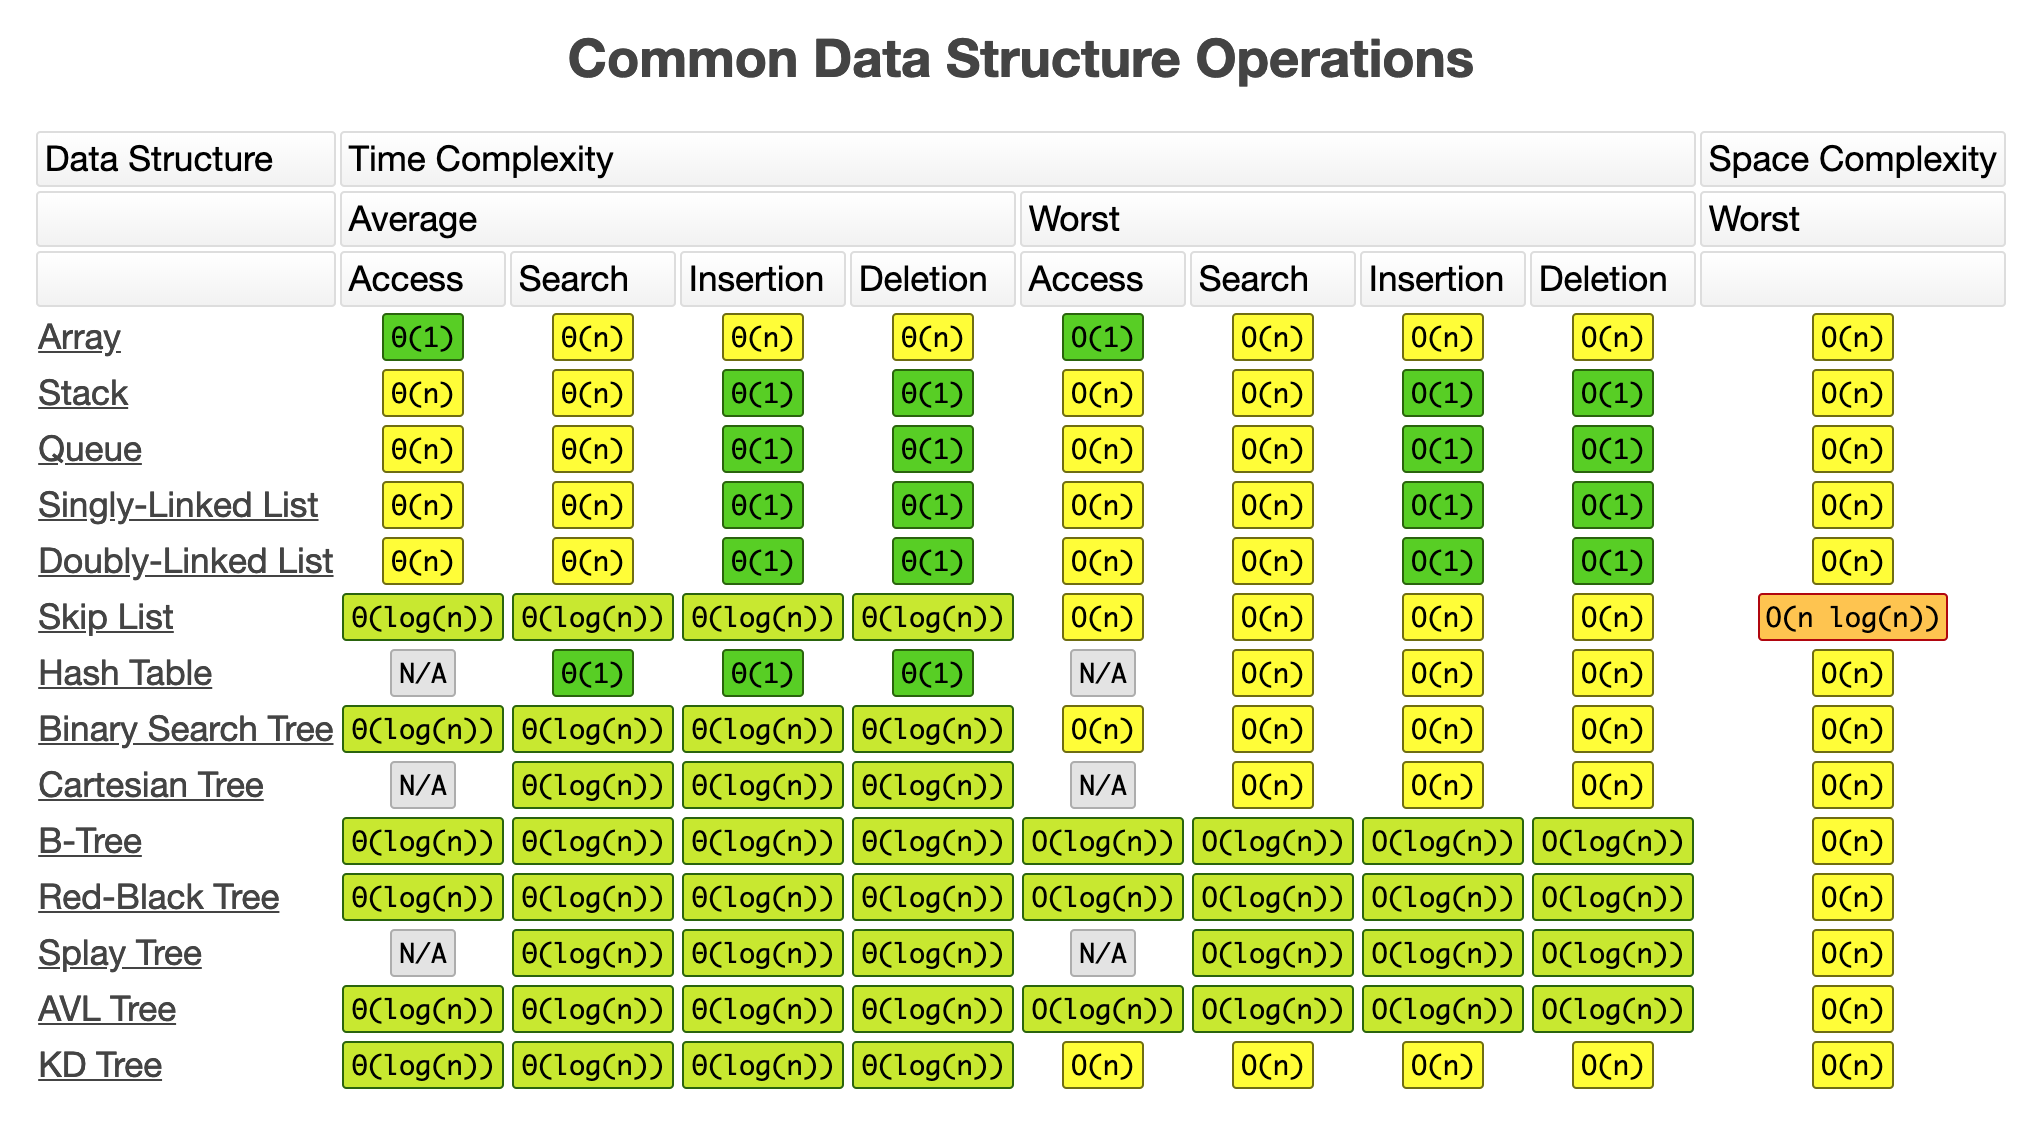

# **Summary**


#### **Describe the selection sort algorithm.**

• The selection sort algorithm sorts a list by repeatedly finding the smallest element of the unsorted tail region and moving it to the front.

#### **Measure the running time of a function.**

• To measure the running time of a function, get the current time immediately before and after the function call.

#### **Use big-Oh notation to describe the running time of an algorithm.**

• Computer scientists use big-Oh notation to describe the growth rate of a function.

• Selection sort is an O(n2) algorithm. Doubling the data set means a fourfold increase in processing time.

• Insertion sort is an O(n2) algorithm.

#### **Describe the merge sort algorithm.**

• The merge sort algorithm sorts a list by cutting the list in half, recursively sorting each half, and then merging the sorted halves.

#### **Contrast the running times of the merge sort and selection sort algorithms.**

• Merge sort is an O(n log(n)) algorithm. The n log(n) function grows much more slowly than n2.

#### **Describe the running times of the linear search algorithm and the binary search algorithm.**

• A linear search examines all values in a list until it finds a match or reaches the end.

• A linear search locates a value in a list in O(n) steps.

• A binary search locates a value in a sorted list by determining whether the value occurs in the first or second half, then repeating the search in one of the halves.

• A binary search locates a value in a sorted list in O(log(n)) steps.

#### **Practice developing big-Oh estimates of algorithms.**

• A loop with n iterations has O(n) running time if each step consists of a fixed number of actions.

• A loop with n iterations has O(n2) running time if each step takes O(n) time.

• The big-Oh running time for doing several steps in a row is the largest of the big-Oh times for each step.

• A loop with n iterations has O(n2) running time if the ith step takes O(i) time.
            
• An algorithm that cuts the size of work in half in each step runs in O(log(n)) time.